In [63]:
# melakukan import library
import tensorflow as tf
import tensorflow.keras.optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [64]:
# melihat versi TensorFlow
print(tf.__version__)

2.3.0


In [65]:
# mengambil dataset via link
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-07 17:42:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.46MB/s    in 48s     

2020-10-07 17:43:24 (6.43 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [66]:
# mengekstraksi file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
sumber_dataset = '/tmp/rockpaperscissors/rps-cv-images/'

In [67]:
# membuat ImageDataGenerator
img_dat_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        fill_mode='nearest')

In [68]:
# membuat train dan validation generator
train_gen = img_dat_gen.flow_from_directory(
        sumber_dataset, 
        target_size=(200, 300),  
        batch_size=16,
        shuffle=True,
        subset = 'training',
        class_mode="categorical")
 
valid_gen = img_dat_gen.flow_from_directory(
        sumber_dataset, 
        target_size=(200, 300), 
        batch_size=16, 
        subset = 'validation',
        class_mode="categorical")

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [21]:
# from tensorflow.keras.applications import ResNet152V2
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import VGG19

In [22]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_accuracy')>0.92)&(logs.get('accuracy')>0.92):
#       print("\nAkurasi telah mencapai >92%!")
#       self.model.stop_training = True
# callbacks = myCallback()

In [23]:
# checkpoint_path = "/content/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Buat Callback untuk save weight model, jaga2 kalau connectionloss
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=2)

In [24]:
# #Membuat fungsi menurunkan Learning Rate saat berada di Plateau
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
#                                                  factor = 0.2, 
#                                                  patience = 2, 
#                                                  verbose = 1, 
#                                                  min_delta=0.001, 
#                                                  min_lr = 1e-10)

In [69]:
class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>0.8):
         print("\nAkurasi telah mencapai >80%!")
         self.model.stop_training = True
   callbacks = myCallback()

In [70]:
# membuat arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [71]:
# compiling model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(learning_rate=0.0015),
              metrics=['accuracy'])

In [72]:
# training model
training = model.fit(train_gen,
                     steps_per_epoch=25,
                     callbacks=[callbacks],  
                     epochs=25,
                     validation_data=valid_gen, 
                     validation_steps=5,
                     verbose=2)

Epoch 1/25
25/25 - 55s - loss: 1.2059 - accuracy: 0.3600 - val_loss: 1.0799 - val_accuracy: 0.3375
Epoch 2/25
25/25 - 55s - loss: 1.0539 - accuracy: 0.4225 - val_loss: 1.0224 - val_accuracy: 0.4375
Epoch 3/25
25/25 - 55s - loss: 1.0071 - accuracy: 0.4900 - val_loss: 0.8439 - val_accuracy: 0.7000
Epoch 4/25
25/25 - 55s - loss: 0.7549 - accuracy: 0.7275 - val_loss: 0.7855 - val_accuracy: 0.6500
Epoch 5/25
25/25 - 55s - loss: 0.6160 - accuracy: 0.7400 - val_loss: 0.7545 - val_accuracy: 0.6500
Epoch 6/25
25/25 - 54s - loss: 0.5547 - accuracy: 0.7391 - val_loss: 0.4554 - val_accuracy: 0.8875
Epoch 7/25
25/25 - 54s - loss: 0.4715 - accuracy: 0.8235 - val_loss: 0.5351 - val_accuracy: 0.7875
Epoch 8/25
25/25 - 55s - loss: 0.4160 - accuracy: 0.8300 - val_loss: 0.3812 - val_accuracy: 0.8375
Epoch 9/25
25/25 - 55s - loss: 0.3651 - accuracy: 0.8700 - val_loss: 0.4476 - val_accuracy: 0.8750
Epoch 10/25
25/25 - 55s - loss: 0.4197 - accuracy: 0.8250 - val_loss: 0.4902 - val_accuracy: 0.8000
Epoch 11/

In [ ]:
# 

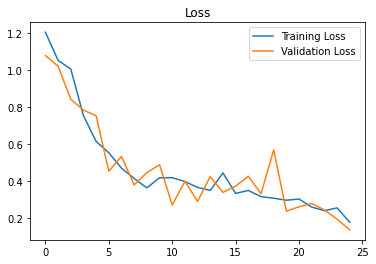

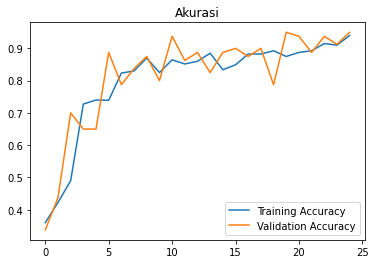

In [73]:
# plotting history loss dan akurasi
plot_loss = [training.history['loss'],training.history['val_loss']]

plt.plot(range(len(plot_loss[0])), plot_loss[0], label='Training Loss')
plt.plot(range(len(plot_loss[1])), plot_loss[1], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

plot_acc = [training.history['accuracy'],training.history['val_accuracy']]

plt.plot(range(len(plot_acc[0])), plot_acc[0], label='Training Accuracy')
plt.plot(range(len(plot_acc[1])), plot_acc[1], label='Validation Accuracy')
plt.title('Akurasi')
plt.legend()
plt.show()

Saving 1lEpWTJDphkm3HdC.png to 1lEpWTJDphkm3HdC (1).png
1lEpWTJDphkm3HdC.png
[[0. 0. 1.]]
Gunting


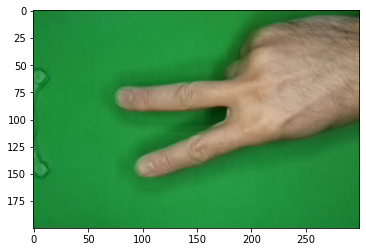

In [ ]:
# # membuat box untuk input gambar
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline
 
# uploaded = files.upload()
 
# for fn in uploaded.keys():
 
#   path = fn
#   img = image.load_img(path, target_size=(200,300))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
 
#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
  
#   print(fn)
#   print(classes)
#   if classes[0][0] == 1 :
#     print("Kertas")
#   elif classes[0][1] == 1 :
#     print("Batu")
#   elif classes[0][2] == 1 :
#     print("Gunting")
#   else :
#     print("Error")

In [74]:
MODEL_NAME = 'BatuGuntingKertas'
model.save(MODEL_NAME)

INFO:tensorflow:Assets written to: BatuGuntingKertas/assets


INFO:tensorflow:Assets written to: BatuGuntingKertas/assets


In [75]:
model.save('BatuGuntingKertas.h5')

In [76]:
# Convert model.
converter = tf.lite.TFLiteConverter.from_saved_model('/content/BatuGuntingKertas')
tflite_model = converter.convert()

#Menyimpan Model.
with tf.io.gfile.GFile('/content/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
